In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from theta import rtbm, minimizer, model, layers, gradientschemes, stopping
from theta.costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

# Example 1

## Generate data

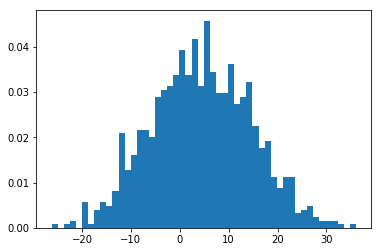

In [2]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training with CMA

In [19]:
    from theta.mathtools import check_normalization_consistency

In [31]:
for i in range(1000):
    M = rtbm.RTBM(10,10, phase=1j, random_bound=0.1)

    if not check_normalization_consistency(M.t, M.q, M.w):
        print('error')

In [10]:


minim = minimizer.CMA(False)
solution = minim.train(logarithmic, M, data, tolfun=1e-4)

CMA on 1 cpu(s) enabled
WARNING (module=cma.utilities.utils, class=CMAEvolutionStrategy, method=__init__):  
            Initial solution is out of the domain boundaries:
                x0   = [-0.60570543 -0.          0.          0.         -0.         -0.         -0.
  0.          0.          0.          0.          2.03359305  2.28690086
  0.15431908 -0.97224563 -1.86448472 -0.95831282  1.80553202  1.70095095
 -0.74035843  0.09448843  3.0304962  -0.14479188  0.96837135  3.24284678
  0.19472784  1.73038015]
                ldom = [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
                udom = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
            THIS MIGHT LEAD TO AN EXCEPTION RAISED LATER ON.
            


ValueError: argument of inverse must be within the given bounds

## Training with SGD

In [5]:
M = rtbm.RTBM(1,1,diagonal_T=True)
minim = minimizer.SGD()
solution = minim.train(logarithmic, M, data, lr=0.001, validation_split=0.2, stopping=stopping.earlystop(),
                       scheme=gradientschemes.adam(), batch_size=250, maxiter=200)

Split summary: training size 800 | validation size 200


KeyboardInterrupt: 

## Testing output

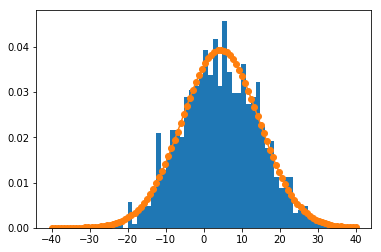

In [8]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), M(test_data).flatten(), 'o-')

# Example 2

## Generate data

In [ ]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training with CMA

In [ ]:
M = rtbm.RTBM(1,2,init_max_param_bound=20)

In [ ]:
minim = minimizer.CMA(False)
solution = minim.train(logarithmic, M, data, tolfun=1e-3)

## Training with SGD

In [ ]:
M = rtbm.RTBM(1,2,diagonal_T=True)

In [ ]:
minim = minimizer.SGD()
solution = minim.train(logarithmic, M, data, lr=0.00001, scheme=gradientschemes.adam(), batch_size=150, maxiter=200)

## Testing output

In [ ]:
test_data = (np.linspace(-20,20, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), M(test_data).flatten(), 'o-')